In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

# Uploading necessary files

In [33]:
data = pd.read_csv(r'C:\Users\KIIT\Desktop\junk\desktop right\subjects\machine learning\MACHINE LEARNING VERZEO\ML-MAJOR-JUNE-ML062B10\Information.csv', encoding='latin-1')
df = data
# Drop unnecessary columns/features
data.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  name                   20050 non-null  object 
 12  profile_yn_gold        50 non-null     object 
 13  retweet_count          20050 non-null  int64  
 14  sidebar_color          20050 non-null  object 
 15  te

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  name                   20050 non-null  object 
 12  profile_yn_gold        50 non-null     object 
 13  retweet_count          20050 non-null  int64  
 14  sidebar_color          20050 non-null  object 
 15  te

In [35]:
data.head(5)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...


In [36]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

df['Tweets'] = [cleaning(s) for s in df['text']]
df['Description'] = [cleaning(s) for s in df['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['Tweets'] = df['Tweets'].str.lower().str.split()
df['Tweets'] = df['Tweets'].apply(lambda x : [item for item in x if item not in stop])

In [37]:
df.head()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text,Tweets,Description
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friends, living, story, û, ...",i m the author of novels filled with family dr...
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...,"[absolutely, adore, louis, starts, songs, hits...",louis whining and squealing and all
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, looking, url, use, ifttt, t...",mobile guy ers shazam google kleiner perkins y...
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...,"[watching, neighbours, sky, catching, neighbs,...",ricky wilson the best frontman kaiser chiefs t...


In [38]:
df.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

# Most common emotions

In [39]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

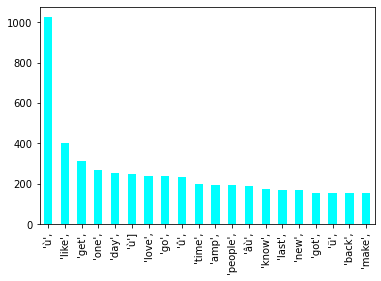

In [40]:
Female_Words.plot(kind='bar',stacked=True, colormap='cool')

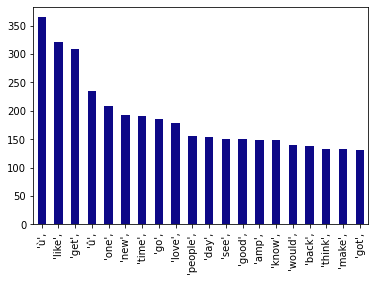

In [41]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [42]:
#removing unknown gender values from the dataset

In [43]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [44]:
drop_items_idx = data[data['gender'] == 'unknown'].index        #dropping data where the gender is unknown
data.drop (index = drop_items_idx, inplace = True)
data['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [45]:
print ('profile_yn information:\n',data['profile_yn'].value_counts())    #printing profile(y/n) information
data[data['profile_yn'] == 'no']['gender']

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
        ... 
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [46]:
drop_items_idx = data[data['profile_yn'] == 'no'].index  #dropping columns
data.drop (index = drop_items_idx, inplace = True)
print (data['profile_yn'].value_counts())
data.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [47]:
print (data['gender'].value_counts())
print ('---------------------------')
data.info()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _golden             18836 non-null  bool   
 1   _unit_state         18836 non-null  object 
 2   _trusted_judgments  18836 non-null  int64  
 3   gender              18836 non-null  object 
 4   gender:confidence   18836 non-null  float64
 5   description         15522 non-null  object 
 6   fav_number          18836 non-null  int64  
 7   gender_gold         50 non-null     object 
 8   link_color          18836 non-null  object 
 9   name                18836 non-null  object 
 10  retweet_count       18836 non-null  int64  
 11  sidebar_color       18836 non-null  object 
 12  text                18836 non-null  object 
 13  Tweets              18836 non-null  object 
 14  De

In [48]:
print ('Full data items: ', data.shape)#dropping data having gender confidence less than 1.
print ('Data with label-confidence < 100%: ', data[data['gender:confidence'] < 1].shape)

Full data items:  (18836, 15)
Data with label-confidence < 100%:  (5032, 15)


In [49]:
drop_items_idx = data[data['gender:confidence'] < 1].index
data.drop (index = drop_items_idx, inplace = True)
print (data['gender:confidence'].value_counts())
data.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


In [50]:
data.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)#dropping columns
# Double check the data 
print (data['gender'].value_counts())
print ('---------------------------')
data.info()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         13804 non-null  object
 1   description    11773 non-null  object
 2   fav_number     13804 non-null  int64 
 3   link_color     13804 non-null  object
 4   name           13804 non-null  object
 5   retweet_count  13804 non-null  int64 
 6   sidebar_color  13804 non-null  object
 7   text           13804 non-null  object
 8   Tweets         13804 non-null  object
 9   Description    13804 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB


In [51]:
from collections import Counter #finding most common words used
twit_vocab = Counter()
for twit in data['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1
        
# desc_vocab = Counter()
# for twit in data['description']:
#     for word in twit.split(' '):
#         desc_vocab[word] += 1
        
twit_vocab.most_common(20)

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

In [52]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [53]:
#Removing trash
import re

def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text
print(preprocessor('This!!@ twit :) is <b>nice</b>'))

this twit is nice :)


In [54]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):#using porter stemmer for stemming words#
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


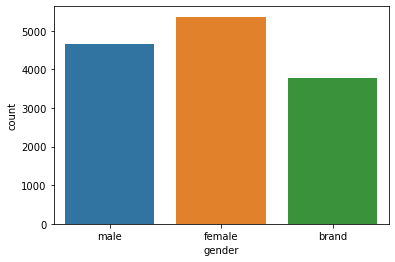

In [55]:
#countplot to visualize the amount of each label
sns.countplot(data['gender'],label="Gender")

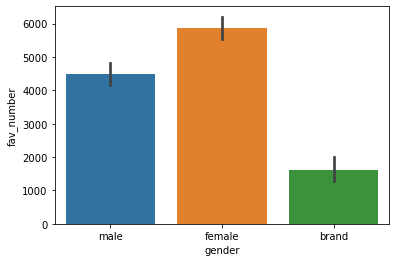

In [56]:
#bar plot to visualize the amount of favourites and retweet
sns.barplot (x = 'gender', y = 'fav_number',data = data)

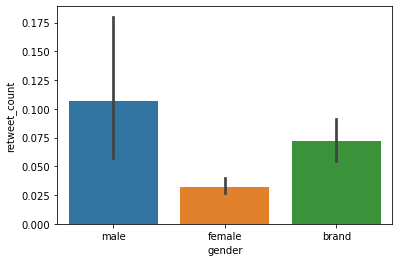

In [57]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)

# training with tweet text only

In [58]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])
X = data['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train.head()

19087    @rvpisarapist my players literally give 110% a...
11212    Backers of the atrium lobby considered joining...
14799    I was supposed to receive my @SpiritHalloween ...
6846     Depression comes when you least expect it, lik...
1226     Grimes Throws a Fun, Bloody Party in "Flesh Wi...
Name: text, dtype: object

In [59]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))


Accuracy: 0.6001931434089812


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
n = range (1,100,10) #step 10
results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)

In [ ]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

In [ ]:
#SVM
from sklearn.svm import SVC
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

# Adding description text

In [ ]:
data.head(3)

In [ ]:
#Fill NaN with empty string
data.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
data['text_description'] = data['text'].str.cat(data['description'], sep=' ')

data['text_description'].isnull().value_counts()

In [ ]:
X = data['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train.head()
X_train.isnull().values.any()

In [ ]:
#Logistic 
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

In [ ]:
#Random forest
n = range (1,120,10) 
results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

In [ ]:
#SVM
from sklearn.svm import SVC
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

# Ensemble technique: take all 3 Models

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 80, random_state=0)
clf3 = SVC(kernel = 'linear',probability = True, random_state=0)
ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')
clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))